# Notebook to classifier good weather days based off TSI data

inputs:
   1. telemetry files (week long logs)
    * neid_ljpyrohelio_chv0_yyyymmdd.tel
   2. Classifier model (pickle file)
    * model = pickle.load(open("model.pkl", "rb"))

outputs:
   1. list of classifed data points
    * dates list with corresponding weather label
   2. plots of good and bad weather days
    * plots compare weather cuts with ideal model


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import source.pyr_funcs as pf

## Read in files and parse data

In [5]:
# read in files
dir_path = "fill in path to directory with telemetry files"
dir_path = "/Users/tervin/pyr_classifier/pyr_data"
files = os.listdir("/Users/tervin/pyr_classifier/pyr_data")
all_files = sorted(files)
files = all_files[12:15]
# files = [files[x] for x in np.arange(0, len(files), 12)]

# parse files
days, full_flux, noon_flux = pf.parse_files(files, dir_path)

## Build model for ideal days

In [6]:
# default location parameters - NEID spectrometer (Kitt Peak, Tuscon AZ)
lat = 32.2
lon = -111
tz = 'US/Arizona'
elevation=735
name='Tucson'

# create TSI model
full_model, noon_model = pf.tsi_model(days, full_flux, lat, lon, tz, elevation, name)

## Calculate statistical parameters for flux data

In [7]:
stats_params = pf.stat_parameters(days, full_flux, noon_flux, full_model)

## Label dates

In [8]:
model_path = "/Users/tervin/pyr_classifier/model.pkl"
date_labels = pf.classify_days(days, stats_params, model_path)


## Plot with label

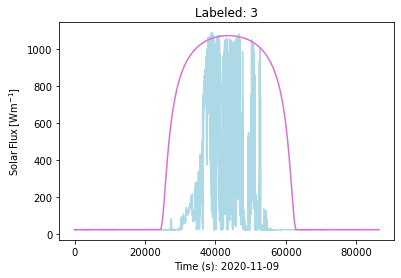

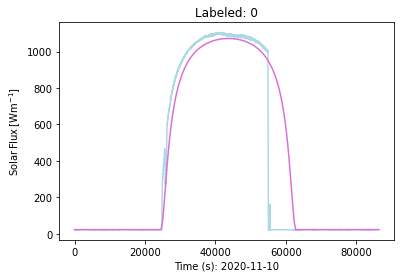

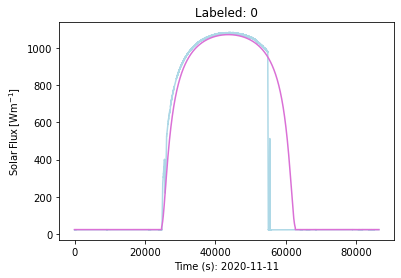

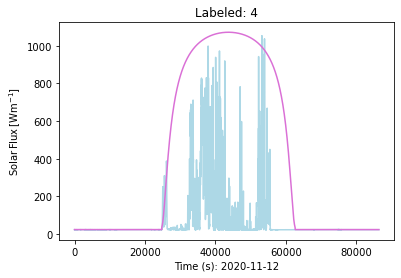

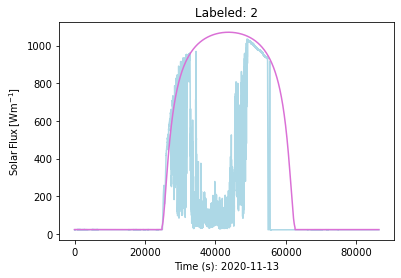

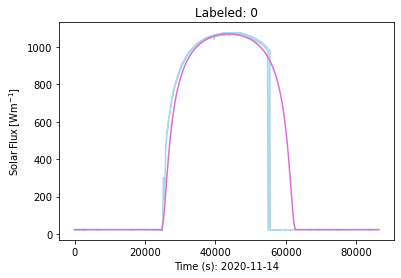

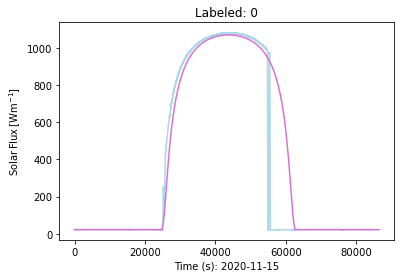

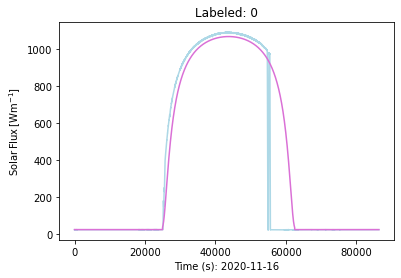

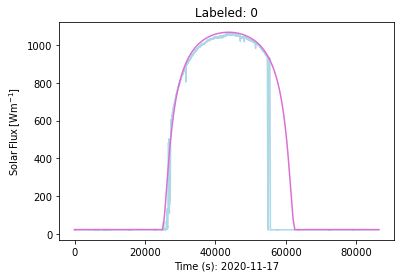

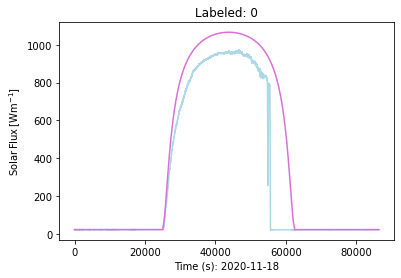

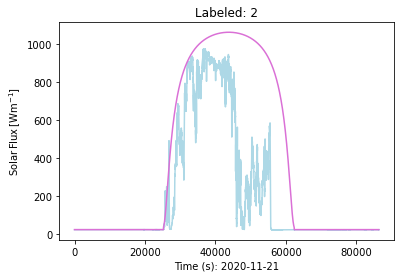

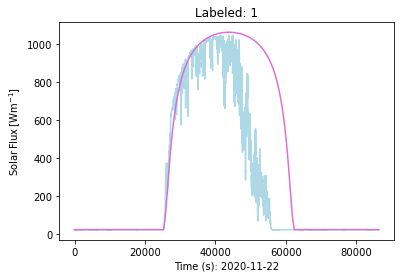

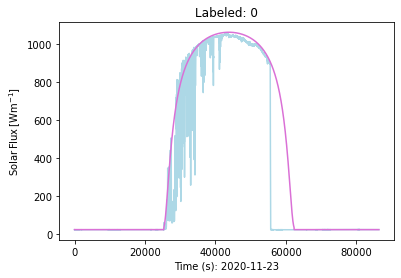

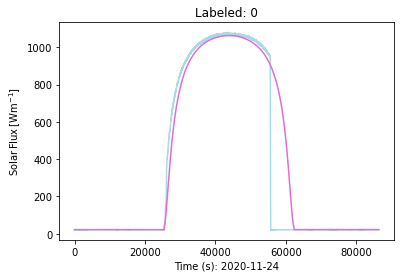

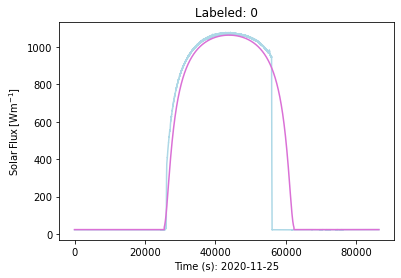

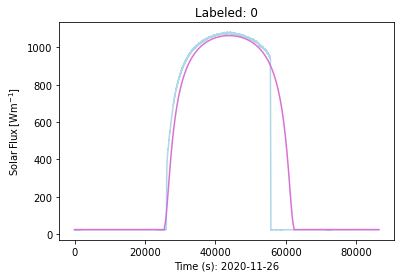

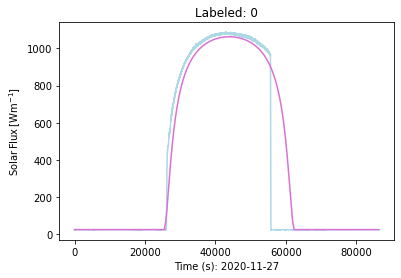

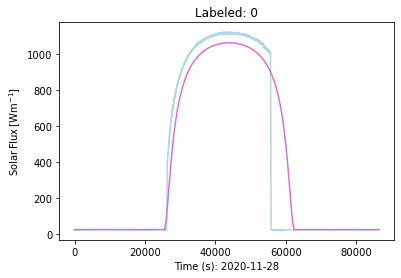

In [9]:
for i, d in enumerate(days):
    plt.figure(i)
    x = np.arange(0, 86400)
    plt.plot(x, full_flux[i], color='lightblue')
    plt.plot(x, full_model[i]*1.08, color='orchid')
    plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
    plt.xlabel('Time (s): ' + str(d))
    plt.title("Labeled: " + str(date_labels[i][1]))